# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.
1. Any changes made in this notebook would be lost after you close the browser window. **You can download the notebook to save your work on your PC.**
1. Before running this notebook on your local PC:<br>
i.  You need to set up a Python environment and the relevant packages on your local PC. To do so, go through the section on "**Run Codes Locally on Your Machine**" in the course.<br>
ii. You need to **download the zip file available in the last unit** of this course. The zip file contains the data files and/or python modules that might be required to run this notebook.


# Reward System

Reward function design is complicated and can significantly impact the performance of the algorithm. In our approach, we used pnl based reward system, but it is conceivable to use other metrics such as Sharpe ratio, average return, etc. 

Here are some of the examples of pnl based reward system.

1. [Percentage pnl](#percentage_pnl)
2. [Positive pnl](#positive_pnl)
3. [Positive log pnl](#positive_log_pnl)
4. [Categorical pnl](#categorical_pnl)
5. [Positive categorical pnl](#positive_categorical_pnl)
6. [Exponential pnl](#exponential_pnl)

<a id='percentage_pnl'></a>

### Percentage pnl
The percentage pnl give the percentage returns from the trade. This is calculated by subtracting the current price from entry price and dividing it by entry price. The simple percentage calculation formula. Finally, it is multiplied with the position (1 for long and -1 for short) of the trade.

We have also incorporated the transaction cost and commissions in the pnl calculation. Feel free to change the transaction cost and commission to a value that suits your local markets and brokers.

You can also include slippage into pnl, but here we are not including it to avoid the complexity.  

In [1]:
def get_pnl(entry, curr_price, position):
    # Transaction cost and commissions
    tc = 0.001
    return (curr_price*(1-tc) - entry*(1+tc))/entry*(1+tc)*position

In [2]:
def reward_pure_pnl(entry, curr_price, position):
    '''pure pnl'''
    return get_pnl(entry, curr_price, position)


# Example:
# Let's see reward for entry price 100 and exit price of 105 for a long position
entry_price = 100
curr_price = 105
position = 1  # Long
print('The percentage pnl is %.2f' %
      (reward_pure_pnl(entry_price, curr_price, position)*100))

The percentage pnl is 4.80


In [3]:
# Now it's your turn, change the values of entry_price, exit_price and position
# And see how the reward changes
entry_price = 101
curr_price = 104
position = -1
print('The percentage pnl is %.2f' %
      (reward_pure_pnl(entry_price, curr_price, position)*100))

The percentage pnl is -2.77


<a id='positive_pnl'></a> 
### Positive pnl
In this pnl reward system, only positive reinforcement is allowed. This means you will be only rewarded when the pnl is positive and no reward is given when the pnl is negative. 

In [4]:
def reward_positive_pnl(entry, curr_price, position):
    '''Positive pnl, zero otherwise'''
    pnl = get_pnl(entry, curr_price, position)

    if pnl >= 0:
        return pnl

    else:
        return 0


# Example:
# Let's see reward for entry price 100 and exit price of 105 for a long position
entry_price = 100
curr_price = 105
position = 1  # Long
print('The reward is %.2f' %
      (reward_positive_pnl(entry_price, curr_price, position)*100))

The reward is 4.80


In [5]:
# Now it's your turn, change the values of entry_price, exit_price and position
# And see how the reward changes
entry_price = 101
curr_price = 104
position = -1
print('The reward is %.2f' %
      (reward_positive_pnl(entry_price, curr_price, position)*100))

The reward is 0.00


<a id='positive_log_pnl'></a> 
### Positive log pnl
This reward system is similar to positive pnl. The only difference is when your percentage pnl is greater or equal to 0, you will calculate the log and then ceiling value of pnl, otherwise 0. 

The ceiling value of a number x is the smallest integer not less than x. In Python, you use ceil() method of Numpy to calculate the ceiling of a number x.

Syntax: 
```python
import numpy as np
np.ceil(x) 
```

Example:
Ceiling value of 1.2 is 2, 1.8 is also 2 and for 0.99 is 1

In [6]:
import numpy as np


def reward_pos_log_pnl(entry, curr_price, position):
    '''Positive log pnl, zero otherwise'''
    pnl = get_pnl(entry, curr_price, position)

    # Return the ceiling of the input
    return [np.ceil(np.log(i*100+1)) if i > 0 else 0 for i in pnl]

In [7]:
# Define values of entry price, current price and position
entry = 100
curr_price = np.linspace(50, 150, 100)
position = 1

# Call reward_pure_pnl and reward_pos_log_pnl
pure_pnl = reward_pure_pnl(entry, curr_price, position)
pos_log_pnl = reward_pos_log_pnl(entry, curr_price, position)

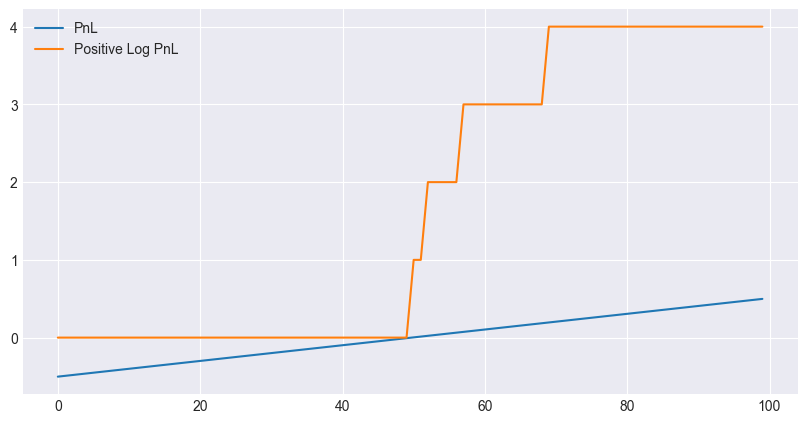

In [8]:
# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')

# Compare pnl and positive log pnl
plt.figure(figsize=(10, 5))
plt.plot(pure_pnl, label='PnL')
plt.plot(pos_log_pnl, label='Positive Log PnL')
plt.legend()
plt.show()

The above graph shows that for the negative value of the pnl, the value of positive log pnl is zero. But as the pnl value moves to positive, the positive log pnl is also positive, and its value depends on the log of the pnl.

<a id='categorical_pnl'></a> 
### Categorical pnl

This categorical pnl reward system returns the sign of the pnl value that is +1 for the positive pnl and -1 for the negative pnl.

In [9]:
def reward_categorical_pnl(entry, curr_price, position):
    '''Sign of pnl'''
    pnl = get_pnl(entry, curr_price, position)
    # Returns an element-wise indication of the sign of the input
    return np.sign(pnl)


# Example:
# Let's see reward for entry price 100 and exit price of 105 for a long position
entry_price = 100
curr_price = 105
position = 1  # Long
print('The reward is %.2f' %
      (reward_categorical_pnl(entry_price, curr_price, position)))

The reward is 1.00


In [10]:
# Now it's your turn, change the values of entry_price, exit_price and position
# And see how the reward changes
entry_price = 101
curr_price = 104
position = -1
print('The reward is %.2f' %
      (reward_categorical_pnl(entry_price, curr_price, position)))

The reward is -1.00


<a id='positive_categorical_pnl'></a> 
### Positive categorical pnl

This is similar to the categorical pnl. Here when the pnl value is greater than zero, it returns 1. When the pnl is negative or equals to 0, it returns 0. This type of pnl reward system can be used where you are creating a long only strategy.

In [11]:
def reward_positive_categorical_pnl(entry, curr_price, position):
    '''1 for win, 0 for loss'''
    pnl = get_pnl(entry, curr_price, position)
    return [1 if i > 0 else 0 for i in pnl]

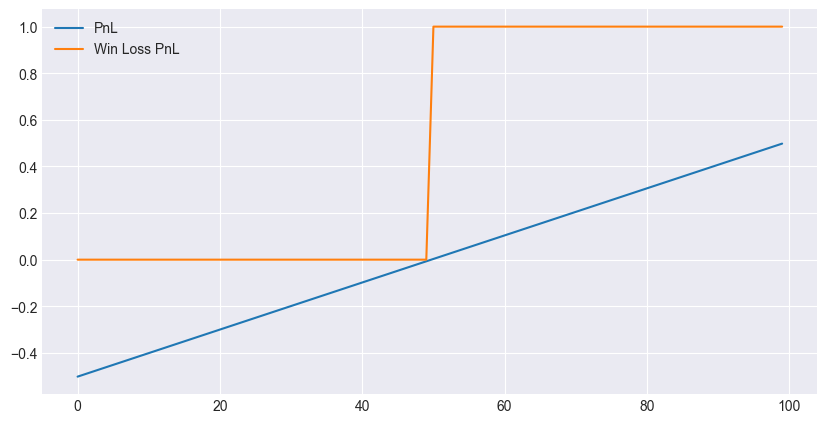

In [12]:
# Define values of entry price, current price and position
entry = 100
curr_price = np.linspace(50, 150, 100)
position = 1

# Call reward_positive_categorical_pnl function
positive_categorical_pnl = reward_positive_categorical_pnl(
    entry, curr_price, position)

# Compare pnl and positive categorical pnl
plt.figure(figsize=(10, 5))
plt.plot(pure_pnl, label='PnL')
plt.plot(positive_categorical_pnl, label='Win Loss PnL')
plt.legend()
plt.show()

As you can see in the above graph, win loss pnl returns zero for the negative pnl and +1 for the positive pnl.

<a id='exponential_pnl'></a>
### Exponential pnl

In this method, we calculate the percentage pnl and then take exponential of that. 

In [13]:
def reward_exponential_pnl(entry, curr_price, position):
    '''Exponentual percentage pnl'''
    pnl = get_pnl(entry, curr_price, position)
    return np.exp(pnl)


exponential_pnl = reward_exponential_pnl(entry, curr_price, position)

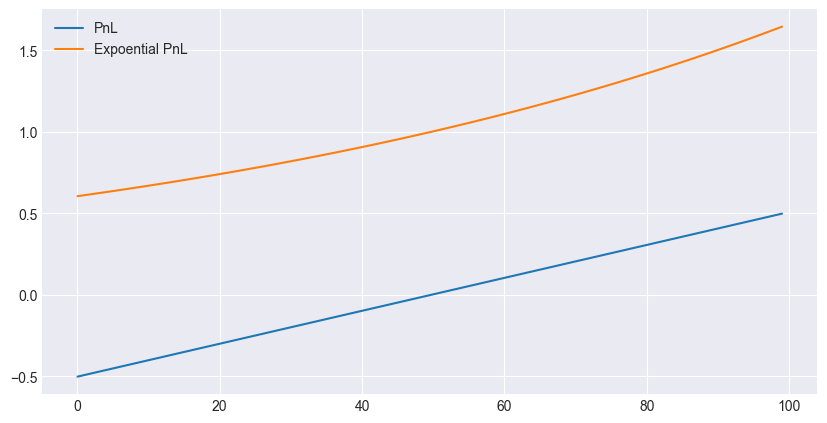

In [14]:
# Define values of entry price, current price and position
entry = 100
curr_price = np.linspace(50, 150, 100)
position = 1

# Call reward_exponential_pnl function
exponential_pnl = reward_exponential_pnl(entry, curr_price, position)

# Compare pnl and positive categorical pnl
plt.figure(figsize=(10, 5))
plt.plot(pure_pnl, label='PnL')
plt.plot(exponential_pnl, label='Expoential PnL')
plt.legend()
plt.show()

In the above graph, you can observe the pnl is increasing linearly, while the exponential pnl graph is increasing exponentially. This type of pnl reward system is used to penalise the small change in the pnl value. 

## Reward design system

In the "Update Position" notebook, you learned that game would only be finished when the current position is opposite of the action suggested by neural networks. When the trading game is finished, you get the reward. In the algorithm, we used the exponential pnl method to calculate the reward.

The below flow chart helps you understand the mechanism of reward system.<br><br>
![title](https://d2a032ejo53cab.cloudfront.net/Glossary/hDQnrHKd/Untitled-Diagram-2.png)

In [15]:
def get_reward(entry, curr_price, position, is_over, reward):
    """Here we calculate the reward when the game is finished.
    """

    # Reward is given, only if the game is over.
    if is_over:
        return reward(entry, curr_price, position)

    # When game is not over
    print('No reward')

### Analyse the output

In [16]:
get_reward(100, 105, -1, True, reward_exponential_pnl)

0.953135741003771

Since the game is over and you are in short position, the reward is calculated using the pnl formula.

In [17]:
get_reward(100, 105, 1, True, reward_exponential_pnl)

1.0491685045268317

Since the game is over and you are in long position, the reward is calculated using the pnl formula.

In [18]:
get_reward(100, 105, -1, False, reward_exponential_pnl)

No reward


Since the game is not over, no reward is given.

We used exponential pnl as a reward system in the algorithm. But you can create your reward system based on Sharpe ratio, maximum drawdown, average return etc. Let's try out one such reward system based on the Sharpe ratio.

In [19]:
# Formula of Sharpe ratio
# Sharpe ratio = (returns on the portfolio - risk-free rate)/ standard deviation of the portfolio's returns







On the final note, you can create your reward system, or you can tweak the pnl based reward system used in this notebook and use according to your strategy. For example, if you are creating a long only strategy, you can use win loss pnl. In this course, you can also try out changing the reward system from exponential pnl to other reward system and can check the efficacy of the algorithm<br><br>